<a href="https://colab.research.google.com/github/bcguilherme/An-lise-de-Vendas-Semanais-da-Walmart-Tend-ncias-e-Insights/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/Walmart.csv')
df.head()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format= '%d-%m-%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


# Qual o preço médio de venda semanal por loja?




In [10]:
media_por_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
media_por_store = media_por_store.sort_values(by = 'Weekly_Sales', ascending = False)

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

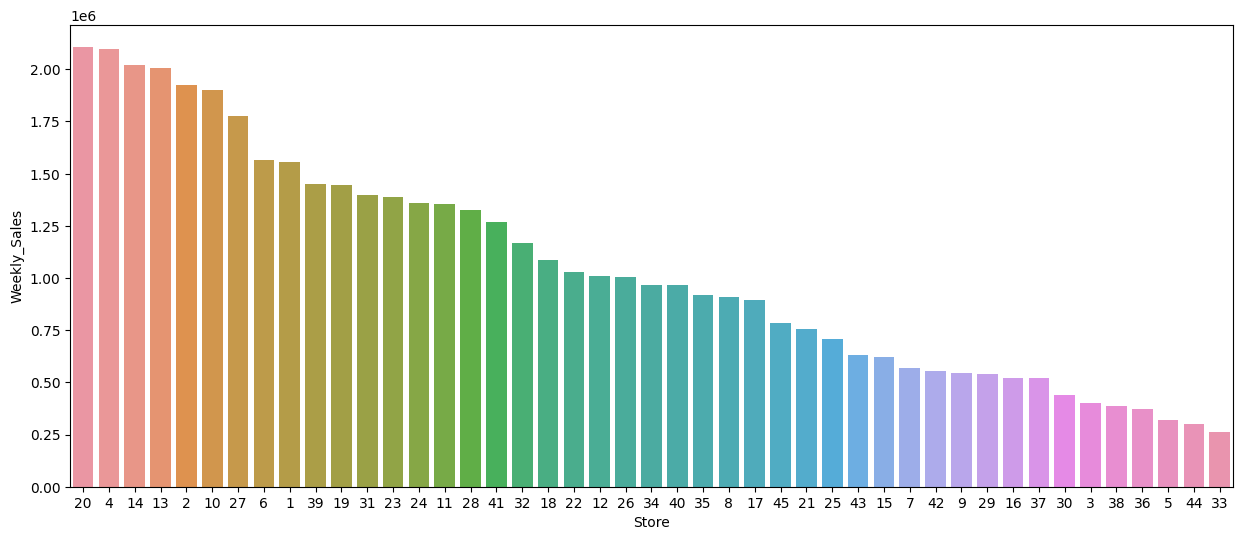

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(media_por_store, x='Store', y='Weekly_Sales', order= media_por_store['Store'])

# Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas?

In [24]:
df_corr = df[['Fuel_Price','Weekly_Sales', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment' ]]

In [25]:
df_corr.corr()

,Fuel_Price,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment
Fuel_Price,1.000000,0.009464,-0.078347,0.144982,-0.170642,-0.034684
Weekly_Sales,0.009464,1.000000,0.036891,-0.063810,-0.072634,-0.106176
Holiday_Flag,-0.078347,0.036891,1.000000,-0.155091,-0.002162,0.010960
Temperature,0.144982,-0.063810,-0.155091,1.000000,0.176888,0.101158
CPI,-0.170642,-0.072634,-0.002162,0.176888,1.000000,-0.302020
Unemployment,-0.034684,-0.106176,0.010960,0.101158,-0.302020,1.000000


<Axes: >

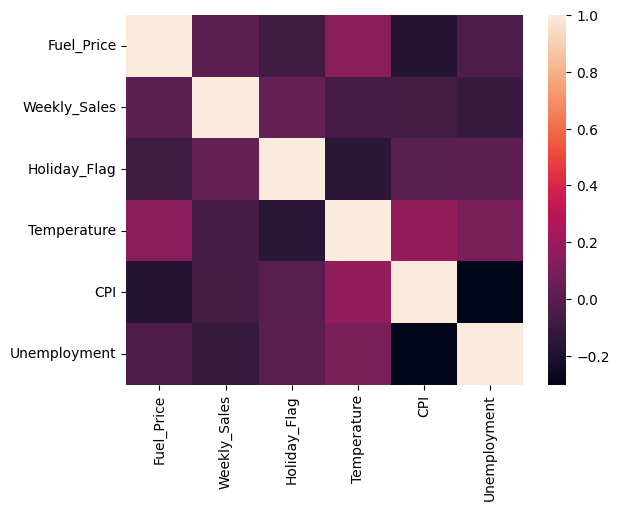

In [26]:
sns.heatmap(df_corr.corr())

# Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

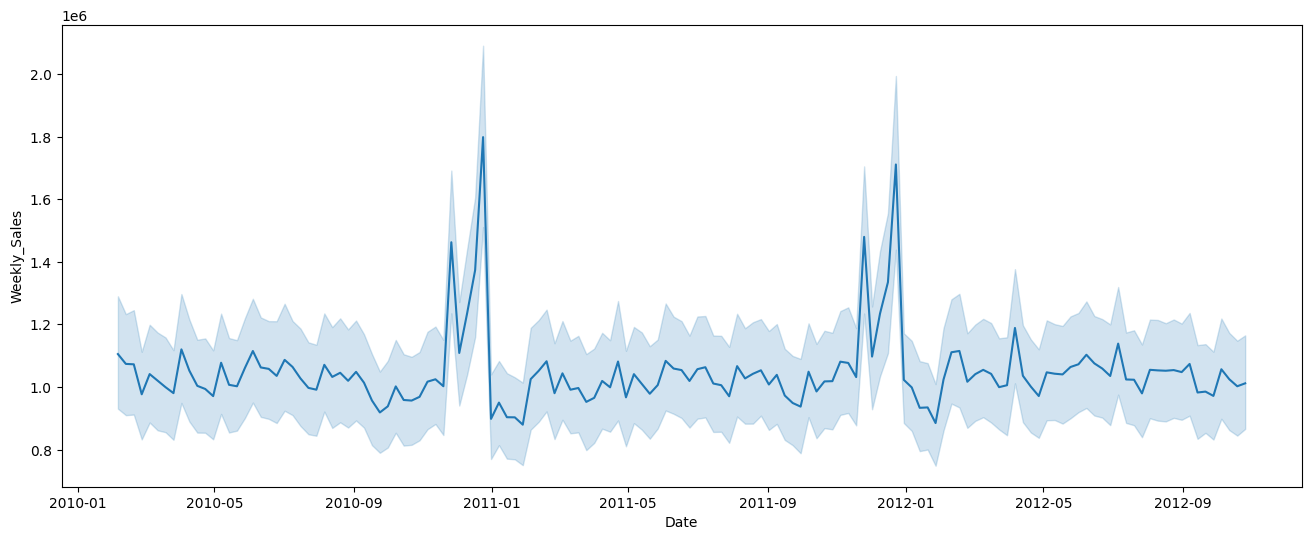

In [29]:
plt.figure(figsize = (16,6))
sns.lineplot(data = df, x = 'Date', y= 'Weekly_Sales')



In [30]:
holiday_dict = {
    'Super Bowl' : ['12/02/10', '11/02/11', '10/02/12'],
    'Labour Day' : ['10/09/10', '09/09/11', '07/09/12'],
    'Thanksgiving' : ['26/09/10', '25/09/11', '23/09/12'],
    'Christmas' : ['31/12/10', '30/12/11', '28/12/12']
}

In [31]:
from datetime import datetime

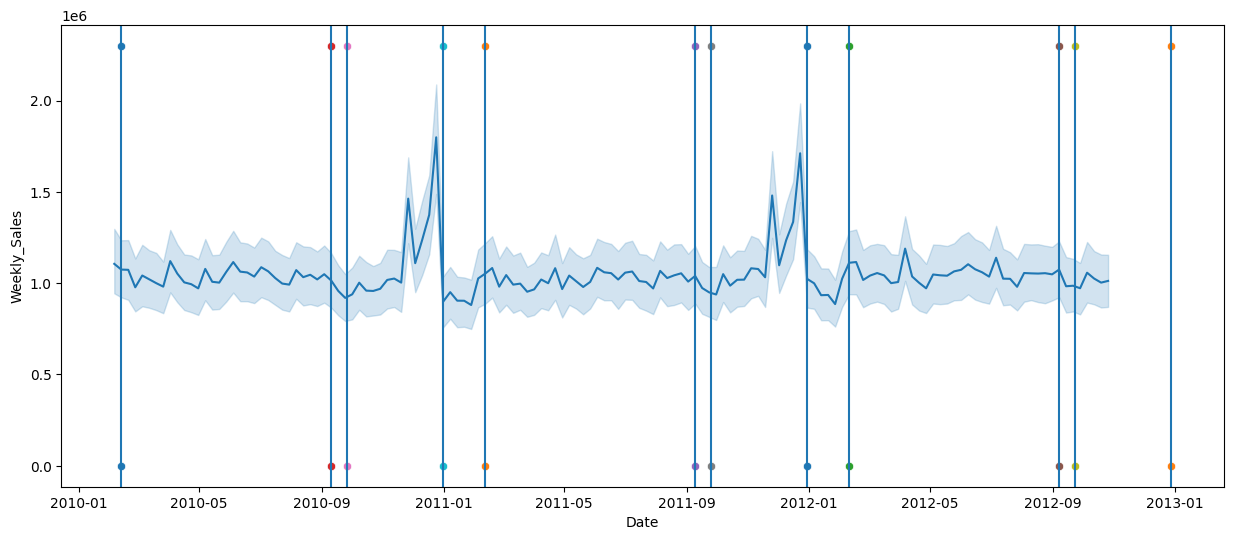

In [33]:
plt.figure(figsize = (15,6))
sns.lineplot(data = df, x = "Date", y = "Weekly_Sales")


for i in holiday_dict.keys():
   for k in holiday_dict[i]:

    sns.scatterplot(x = [datetime.strptime(k, '%d/%m/%y'),datetime.strptime(k,'%d/%m/%y')], y = [0,2.3*10**6])
    plt.axvline(datetime.strptime(k,'%d/%m/%y'),0,2.3*10**6 )

# Pensando na expansão de uma das lojas, que loja você escolheria e o por que?

In [34]:
df_mean = df.groupby('Store', as_index = False).mean()

<ipython-input-34-319d41788cf9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Store', as_index = False).mean()


In [36]:
df_mean = df_mean[['Store', 'Weekly_Sales']]

In [37]:
df_mean

,Store,Weekly_Sales
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05
5,6,1.564728e+06
6,7,5.706173e+05
7,8,9.087495e+05
8,9,5.439806e+05
9,10,1.899425e+06


In [38]:
lista_aux = []
lista_aux1 = []
for i in df_mean.Store:
  lista_aux.append(df[df.Store == i].shape[0])
  lista_aux1.append(df[(df.Store == i) & (df.Weekly_Sales >= df_mean.iloc[i-1,1])].shape[0])

In [39]:
df_mean['Total'] = lista_aux
df_mean['Bateu'] = lista_aux1
df_mean['Perc'] = df_mean['Bateu']/df_mean['Total']*100
df_mean.head()

<ipython-input-39-7aea04f11f70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean['Total'] = lista_aux
<ipython-input-39-7aea04f11f70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean['Bateu'] = lista_aux1
<ipython-input-39-7aea04f11f70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Store,Weekly_Sales,Total,Bateu,Perc
0,1,1.555264e+06,143,56,39.160839
1,2,1.925751e+06,143,53,37.062937
2,3,4.027044e+05,143,64,44.755245
3,4,2.094713e+06,143,62,43.356643
4,5,3.180118e+05,143,56,39.160839


In [40]:
df_mean.sort_values('Perc', ascending = False).head()

,Store,Weekly_Sales,Total,Bateu,Perc
42,43,633324.723147,143,73,51.048951
41,42,556403.863147,143,71,49.650350
35,36,373511.992797,143,71,49.650350
36,37,518900.281958,143,69,48.251748
37,38,385731.653287,143,68,47.552448
